In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dynadojo.systems.lorenz import LorenzSystem
from dynadojo.wrappers import SystemChecker, AlgorithmChecker
from dynadojo.utils.lds import plot
from dynadojo.baselines.sindy import SINDy

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

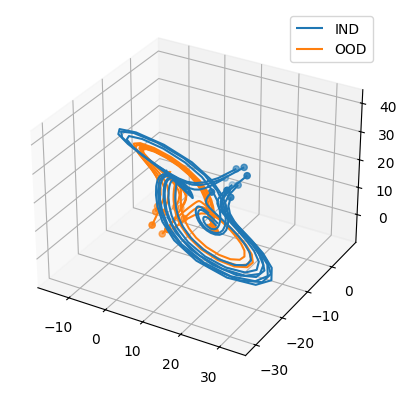

In [13]:
latent_dim = 3
embed_dim = latent_dim
n = 50
test_size = 10
timesteps = 50
system = SystemChecker(LorenzSystem(latent_dim, embed_dim, noise_scale=0, seed=1912))
x0 = system.make_init_conds(n)
y0 = system.make_init_conds(30, in_dist=False)
x = system.make_data(x0, timesteps=timesteps)
y = system.make_data(y0, timesteps=timesteps, noisy=True)
plot([x, y], target_dim=min(latent_dim, 3), labels=["IND", "OOD"], max_lines=test_size)

y_err=5.375378796269739


(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

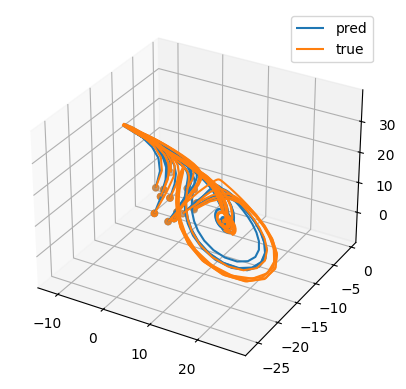

In [15]:
sindy = AlgorithmChecker(SINDy(embed_dim, timesteps, max_control_cost=0, seed=100))
sindy.fit(x)
y_pred = sindy.predict(y[:, 0], timesteps)
y_err = system.calc_error(y, y_pred)
print(f"{y_err=}")
plot([y_pred, y], target_dim=min(3, latent_dim), labels=["pred", "true"], max_lines=15)